# Part 02 - Data Preprocessing with R

#### by Liew Jun Yen

## Packages Installation

In [1]:
install.packages("dplyr")

also installing the dependencies 'pkgconfig', 'withr', 'generics', 'magrittr', 'R6', 'tibble', 'tidyselect'




package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpIZTqxv\downloaded_packages


In [25]:
install.packages("ggplot2")

also installing the dependencies 'lattice', 'colorspace', 'nlme', 'Matrix', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'gtable', 'isoband', 'MASS', 'mgcv', 'scales'





  There are binary versions available but the source versions are later:
              binary  source needs_compilation
Matrix         1.5-4 1.5-4.1              TRUE
viridisLite    0.4.1   0.4.2             FALSE
MASS        7.3-58.3  7.3-60              TRUE

  Binaries will be installed
package 'lattice' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked
package 'mgcv' successfully unpacked 

installing the source package 'viridisLite'




In [27]:
install.packages("ggrepel")

also installing the dependency 'Rcpp'




package 'Rcpp' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpIZTqxv\downloaded_packages


In [18]:
cov_data <- read.csv("C:\\Users\\USER\\Desktop\\Portfolio Project\\owid-covid-data.csv",header=TRUE)

## 2.1 Data Reduction

In [19]:
# [Feature Selection]
# Remove unwanted columns from cov_data dataset
cov_data <- subset(cov_data, select = -c(iso_code, new_cases_smoothed, total_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million,
                                         new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, icu_patients, icu_patients_per_million,
                                         hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million,
                                         total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_units,
                                         total_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred,
                                         total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, excess_mortality_cumulative_absolute,
                                         excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million))

## 2.2 Data Cleaning

In [20]:
# Fill in missing values with 0 value
library(dplyr) #manipulate, clean, summarize unstructured data

cov_data <- cov_data %>%
  mutate(total_cases = coalesce(total_cases, 0),
         new_cases = coalesce(new_cases, 0),
         new_deaths = coalesce(new_deaths, 0),
         reproduction_rate = coalesce(reproduction_rate, 0),
         new_tests = coalesce(new_tests, 0),
         positive_rate = coalesce(positive_rate, 0),
         tests_per_case = coalesce(tests_per_case, 0),
         people_vaccinated = coalesce(people_vaccinated, 0),
         people_fully_vaccinated = coalesce(people_fully_vaccinated, 0),
         total_boosters = coalesce(total_boosters, 0),
         new_vaccinations = coalesce(new_vaccinations, 0),
         stringency_index = coalesce(stringency_index, 0),
         population_density = coalesce(population_density, 0),
         median_age = coalesce(median_age, 0),
         aged_65_older = coalesce(aged_65_older, 0),
         aged_70_older = coalesce(aged_70_older, 0),
         gdp_per_capita = coalesce(gdp_per_capita, 0))

In [21]:
# Fill in missing values with mean value
cov_data$extreme_poverty[is.na(cov_data$extreme_poverty)] <- mean(cov_data$extreme_poverty, na.rm = TRUE)
cov_data$cardiovasc_death_rate[is.na(cov_data$cardiovasc_death_rate)] <- mean(cov_data$cardiovasc_death_rate, na.rm = TRUE)
cov_data$diabetes_prevalence[is.na(cov_data$diabetes_prevalence)] <- mean(cov_data$diabetes_prevalence, na.rm = TRUE)
cov_data$female_smokers[is.na(cov_data$female_smokers)] <- mean(cov_data$female_smokers, na.rm = TRUE)
cov_data$male_smokers[is.na(cov_data$male_smokers)] <- mean(cov_data$male_smokers, na.rm = TRUE)
cov_data$handwashing_facilities[is.na(cov_data$handwashing_facilities)] <- mean(cov_data$handwashing_facilities, na.rm = TRUE)
cov_data$hospital_beds_per_thousand[is.na(cov_data$hospital_beds_per_thousand)] <- mean(cov_data$hospital_beds_per_thousand, na.rm = TRUE)
cov_data$life_expectancy[is.na(cov_data$life_expectancy)] <- mean(cov_data$life_expectancy, na.rm = TRUE)
cov_data$human_development_index[is.na(cov_data$human_development_index)] <- mean(cov_data$human_development_index, na.rm = TRUE)

## 2.3 Data Transformation

In [22]:
# Rename Column
names(cov_data)[names(cov_data) == 'location'] <- 'country'

In [23]:
# Data Types Conversion
cov_data$date = as.Date(cov_data$date, "%Y-%m-%d")

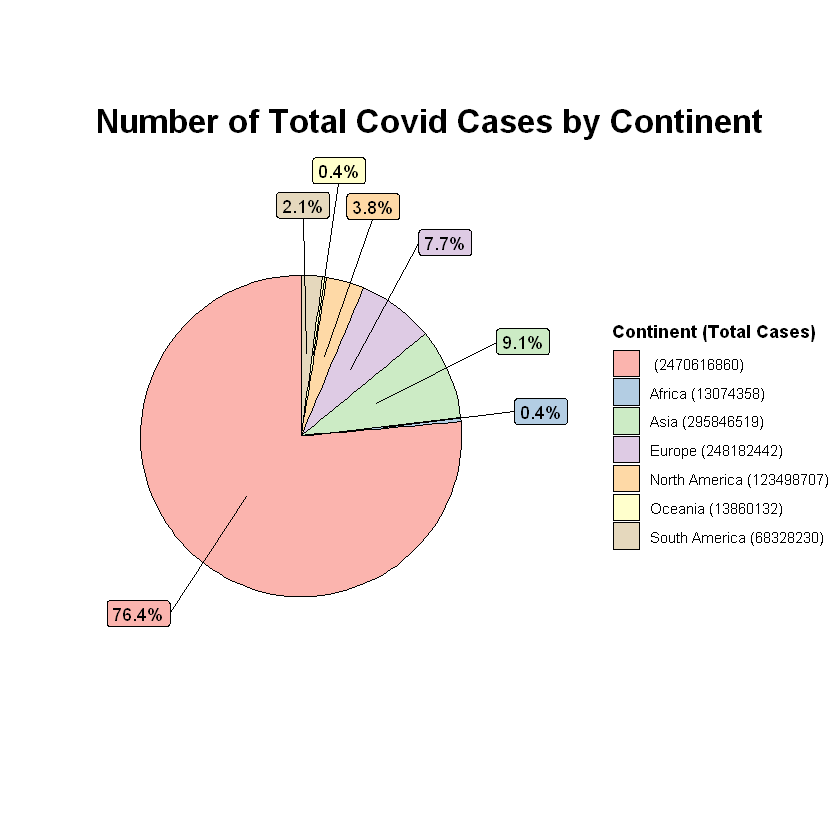

In [31]:
library(ggplot2)
library(ggrepel)

latest_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  group_by(continent) %>%
  summarise(total_cases = sum(total_cases)) %>%
  arrange(desc(continent)) %>%
  mutate(pie_midpoint = cumsum(total_cases) - total_cases / 2) %>%
  mutate(pie_perc = round(total_cases / sum(total_cases) * 100, 1)) %>%
  mutate(pie_legend_labs = paste0(continent, " (", total_cases, ")"))

ggplot(latest_cases, aes(x = "", y = total_cases, fill = pie_legend_labs)) +
  geom_bar(width = 1, stat = "identity", color = "black") +
  geom_label_repel(aes(y = pie_midpoint, label = paste0(pie_perc, "%")), force_pull = 100, nudge_x = 1, show.legend = FALSE) +
  ggtitle("Number of Total Covid Cases by Continent") +
  coord_polar(theta = "y") +
  scale_fill_brewer(palette = "Pastel1") +
  guides(fill = guide_legend(title = "Continent (Total Cases)")) +
  theme_void() + 
  theme(legend.title = element_text(face = "bold"),
        plot.title = element_text(hjust = -1.5, face = "bold", size = 20))

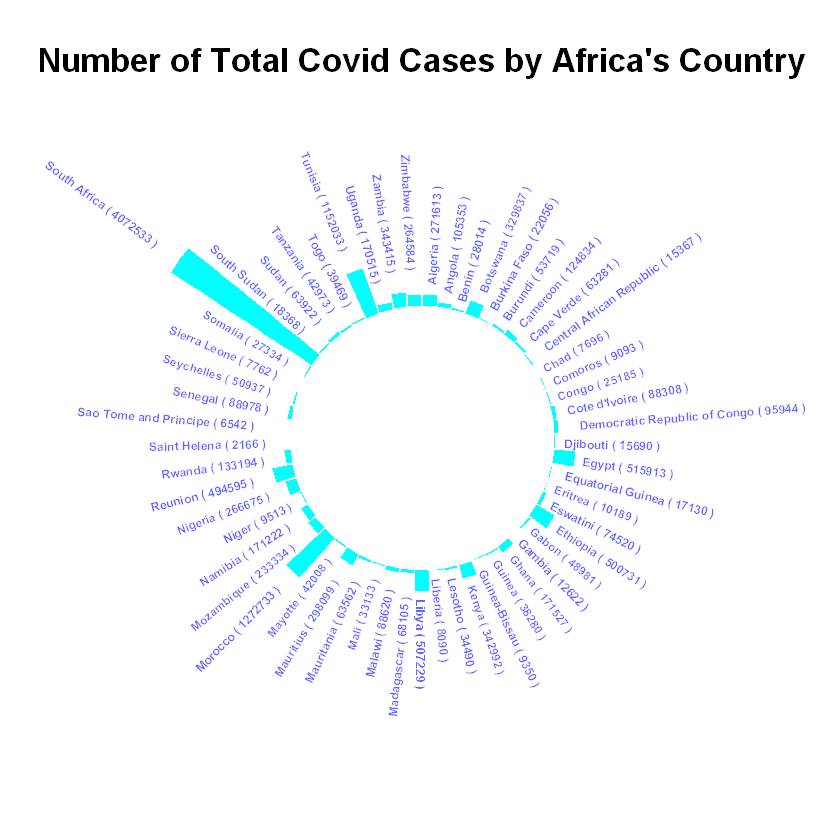

In [33]:
africa_latest_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  filter(continent == 'Africa') %>%
  group_by(country) %>%
  summarise(total_cases = sum(total_cases)) %>%
  mutate(index = row_number())

options(scipen = 4072533)
number_of_label <- nrow(africa_latest_cases)
angle <- 90 - 360 * (africa_latest_cases$index - 0.5) / number_of_label
africa_latest_cases$hjust<-ifelse(angle < -90, 1.2, -0.1)
africa_latest_cases$angle<-ifelse(angle < -90, angle + 180, angle)

ggplot(africa_latest_cases, aes(x = as.factor(country), y = total_cases)) +
  geom_bar(stat = "identity", fill = alpha("cyan")) +
  geom_text(data = africa_latest_cases, aes(x = index, y = total_cases, label = paste(country, "(", total_cases, ")"), hjust = hjust),
            color = "blue", fontface = "bold", alpha = 0.6, size = 2.5, angle = africa_latest_cases$angle, inherit.aes = FALSE) +
  ggtitle("Number of Total Covid Cases by Africa's Country") +  
  ylim(-3200000,max(africa_latest_cases$total_cases) * 1.1) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-0,5), "cm")     
  ) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20, vjust = -6)) +
  coord_polar(start = 0)